<a href="https://colab.research.google.com/github/ALTHD12/PROJECT_1_A/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Finding contours for each color cluster and drawing bounding boxes...
Displaying the final image with overlays.


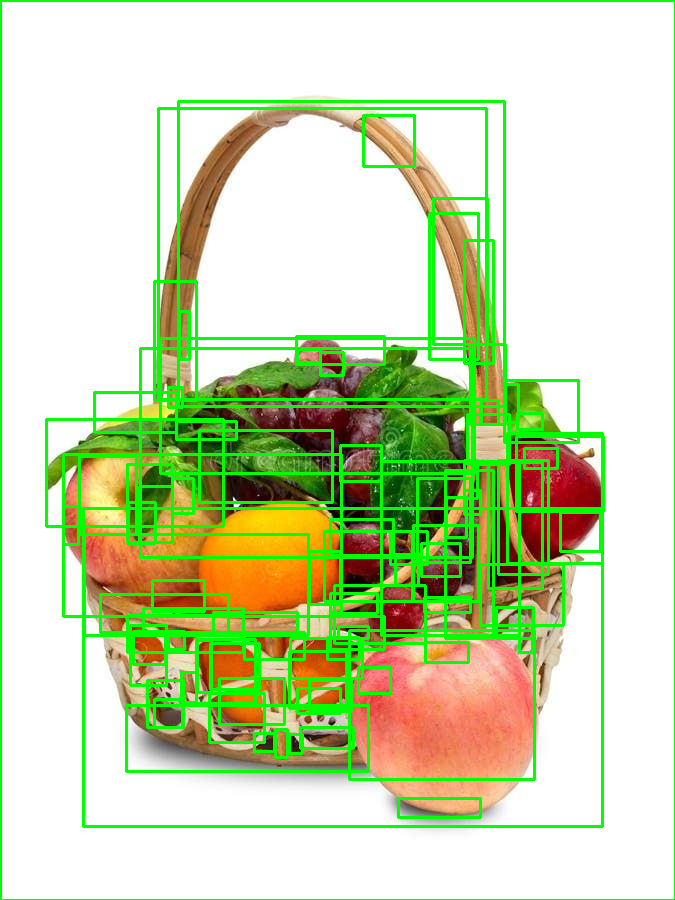

In [3]:
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
try:
    image = cv2.imread('/content/Fruit_Basket.jpg')
    original_image = image.copy()
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
except:
    print("Error: Image not found. Please upload an image and check the filename.")
    original_image = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8)
    image_rgb = original_image.copy()
    print("Using a randomly generated image instead.")

height, width, _ = image_rgb.shape
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(pixel_values)
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[kmeans.labels_.flatten()]
segmented_image = segmented_data.reshape((height, width, 3))

overlay_image = original_image.copy()

print("\nFinding contours for each color cluster and drawing bounding boxes...")

for i in range(k):
    cluster_color = centers[i]

    mask = cv2.inRange(segmented_image, cluster_color, cluster_color)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(overlay_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

print("Displaying the final image with overlays.")
cv2_imshow(overlay_image)